In [1]:
from google.colab import drive
drive.mount('/content/drive')

!ls

Mounted at /content/drive
drive  sample_data


# Data preprocessing

In [38]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt

In [39]:
path = Path('drive/MyDrive/cs231/Dataset')
model_path = Path('drive/MyDrive/cs231/checkpoints_18')
data = pd.read_csv(path / 'icml_face_data.csv')

In [40]:
data.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [41]:
import numpy as np
import cv2

def prepare_data(data):
    """ Prepare data for modeling
        input: data frame with labels und pixel data
        output: image and label array """

    image_array = np.zeros(shape=(len(data), 48, 48, 3)) # change here
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, ' pixels'], dtype=np.float32, sep=' ')
        image = np.reshape(image, (48, 48))

        # custom
        image = image[..., np.newaxis]
        image = np.repeat(image, 3, axis=2)

        image_array[i] = image

    return image_array, image_label



def prepare_data(data):
    """ Prepare data for modeling
        input: data frame with labels und pixel data
        output: image and label array """

    image_array = np.zeros(shape=(len(data), 48, 48, 3)) # change here
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, ' pixels'], dtype=np.float32, sep=' ')
        image = np.reshape(image, (48, 48))

        # custom
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

        image_array[i] = image

    return image_array, image_label

def plot_examples(label=0):
    fig, axs = plt.subplots(1, 5, figsize=(25, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(5):
        idx = data[data['emotion']==label].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])

def plot_all_emotions():
    fig, axs = plt.subplots(7, 7, figsize=(30, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(7):
        for j in range(1, 8):

            idx = data[data['emotion']==i].index[i + j]
            axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
            axs[i].set_title(emotions[train_labels[idx].argmax()])
            axs[i].set_xticklabels([])
            axs[i].set_yticklabels([])

def plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, image_number):
    """ Function to plot the image and compare the prediction results with the label """

    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

    bar_label = emotions.values()

    axs[0].imshow(test_image_array[image_number], 'gray')
    axs[0].set_title(emotions[test_image_label[image_number]])

    axs[1].bar(bar_label, pred_test_labels[image_number], color='orange', alpha=0.7)
    axs[1].grid()

    plt.show()

def plot_compare_distributions(array1, array2, title1='', title2=''):
    df_array1 = pd.DataFrame()
    df_array2 = pd.DataFrame()
    df_array1['emotion'] = array1.argmax(axis=1)
    df_array2['emotion'] = array2.argmax(axis=1)

    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    x = emotions.values()

    y = df_array1['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[0].bar(x, y.sort_index(), color='orange')
    axs[0].set_title(title1)
    axs[0].grid()

    y = df_array2['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[1].bar(x, y.sort_index())
    axs[1].set_title(title2)
    axs[1].grid()

    plt.show()

def to_categorical(y, num_classes=7):
    """ 1-hot encodes a tensor """
    return np.eye(num_classes, dtype='uint8')[y]

In [42]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [43]:
train_image_array, train_image_label = prepare_data(data[data[' Usage']=='Training'])
val_image_array, val_image_label = prepare_data(data[data[' Usage']=='PrivateTest'])
test_image_array, test_image_label = prepare_data(data[data[' Usage']=='PublicTest'])

In [44]:
print(train_image_array.shape)
print(train_image_label.shape)

(28709, 48, 48, 3)
(28709,)


In [45]:
train_labels = train_image_label
val_labels = val_image_label
test_labels = test_image_label

In [46]:
train_images = train_image_array.astype('float32')/255
val_images = val_image_array.astype('float32')/255
test_images = test_image_array.astype('float32')/255

In [47]:

train_images.dtype

dtype('float32')

# Visualize

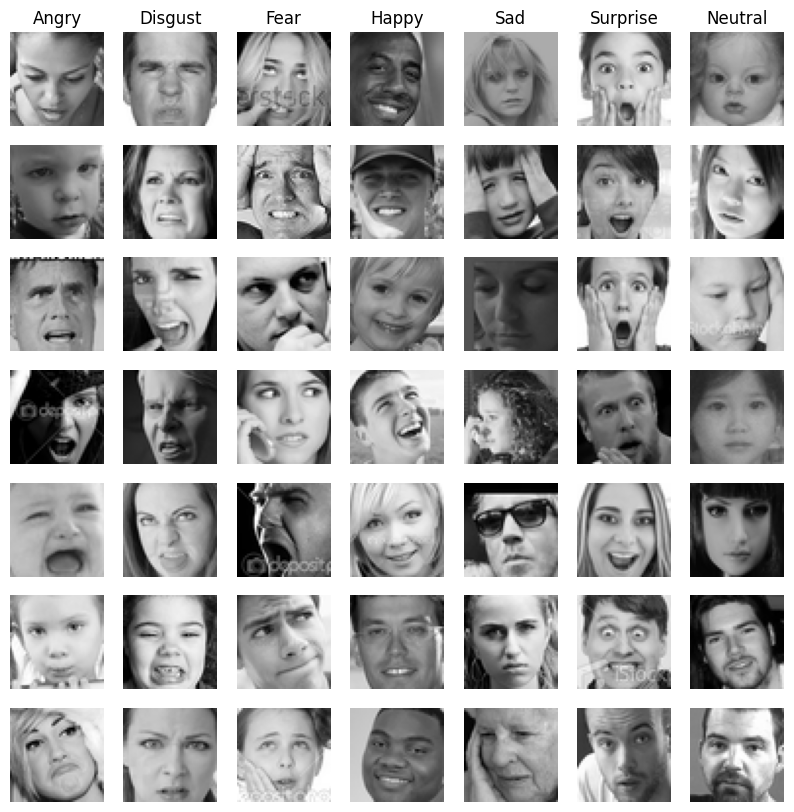

In [90]:
# All emotions
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(7, 7, figsize=(10, 10))
for i in range(0, 7):
    plot_images = train_images[train_labels == i]
    axs[0, i].set_title(emotions[i])
    for j in range(0, 7):
        im = plot_images[np.random.randint(0, high=len(plot_images))]
        axs[j, i].imshow(im, cmap='gray')
        axs[j, i].axis("off")
plt.show()


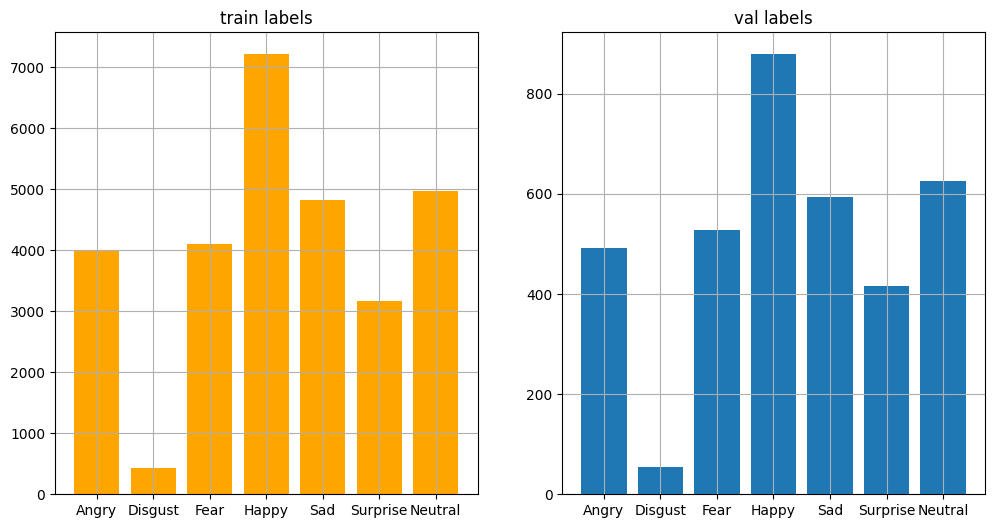

In [49]:
plot_compare_distributions(to_categorical(train_labels), to_categorical(val_labels), title1='train labels', title2='val labels')

# Data Augmentation

In [50]:
import cv2
import numpy as np

def ten_crop(img, size):
    h, w, _ = img.shape
    center_crop = cv2.resize(cv2.getRectSubPix(img, (size, size), (w // 2, h // 2)), (size, size))

    top_left = img[:size, :size]
    top_right = img[:size, -size:]
    bottom_left = img[-size:, :size]
    bottom_right = img[-size:, -size:]

    flipped_center_crop = cv2.flip(center_crop, 1)
    flipped_top_left = cv2.flip(top_left, 1)
    flipped_top_right = cv2.flip(top_right, 1)
    flipped_bottom_left = cv2.flip(bottom_left, 1)
    flipped_bottom_right = cv2.flip(bottom_right, 1)

    crops = [center_crop, top_left, top_right, bottom_left, bottom_right,
             flipped_center_crop, flipped_top_left, flipped_top_right, flipped_bottom_left, flipped_bottom_right]

    return crops

In [51]:
print(train_labels.shape)

(28709,)


In [52]:
def train_augment(images, labels):
    final_imgs = np.zeros((len(images) * 10, 42, 42, 3))
    final_labels = np.zeros((len(labels) * 10, 7))
    for i in range(len(images)):
        crops = ten_crop(images[i], 42)
        ten_images = np.vstack([arr.reshape(1, *crops[0].shape) for arr in crops])
        ten_labels = np.tile(labels[i], (10, 1))
        final_imgs[(i+1)*10-10:(i+1)*10] = ten_images
        final_labels[(i+1)*10-10:(i+1)*10] = ten_labels

    return final_imgs, final_labels

In [53]:
def train_augment(images, labels):
    final_imgs = np.zeros((len(images) * 10, 42, 42, 3))
    final_labels = np.zeros((len(labels) * 10, 1))
    for i in range(len(images)):
        crops = ten_crop(images[i], 42)
        ten_images = np.vstack([arr.reshape(1, *crops[0].shape) for arr in crops])
        ten_labels = np.tile(labels[i], (10, 1))
        final_imgs[(i+1)*10-10:(i+1)*10] = ten_images
        final_labels[(i+1)*10-10:(i+1)*10] = ten_labels

    return final_imgs, final_labels

In [54]:
aug_images, aug_labels = train_augment(train_images, train_labels)

In [55]:
aug_images = aug_images.astype(np.float32)
aug_labels = aug_labels.astype(np.int64)

In [56]:
print(aug_images.shape)
print(aug_labels.shape)

(287090, 42, 42, 3)
(287090, 1)


# Data Loader

In [57]:
from PIL import Image
from matplotlib import cm
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

class FerDataset(Dataset):
    def __init__(self, imgs, labels, transform=None, target_transform=None, augment=None):

        self.transform = transform
        self.target_transform = target_transform
        self.imgs = imgs
        self.labels = labels

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        image = self.imgs[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [58]:
from torchvision.transforms import v2
from torchvision import transforms

img_transform = v2.Compose([
    ToTensor(),
    v2.Resize(224)
])

# train_dataset = FerDataset(train_images, train_labels, transform=img_transform, target_transform=img_transform)
# val_dataset = FerDataset(val_images, val_labels, transform=img_transform, target_transform=img_transform)
# test_dataset = FerDataset(test_images, test_labels, transform=img_transform, target_transform=img_transform)

aug_dataset = FerDataset(aug_images, aug_labels, transform=img_transform)
train_dataset = FerDataset(train_images, train_labels, transform=img_transform)
val_dataset = FerDataset(val_images, val_labels, transform=img_transform)
test_dataset = FerDataset(test_images, test_labels, transform=img_transform)

In [59]:
from torch.utils.data import DataLoader

aug_dataloader = DataLoader(aug_dataset, batch_size=256, shuffle=True)
train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=256, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=256, shuffle=True)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Feature batch shape: torch.Size([3, 224, 224])
Labels batch shape: torch.Size([256, 1])


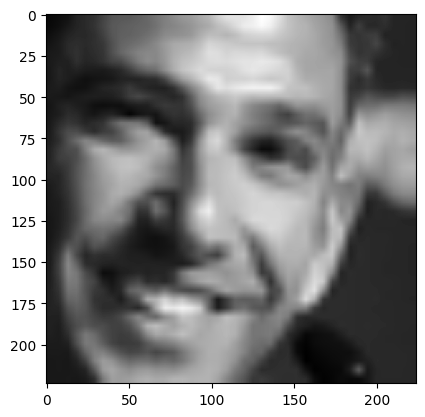

Label: tensor([3])


In [60]:
train_features, train_l = next(iter(aug_dataloader))
print(f"Feature batch shape: {train_features[0].size()}")
print(f"Labels batch shape: {train_l.size()}")
img = train_features[0].squeeze()
label = train_l[0]
plt.imshow(img[0], cmap='gray')
plt.show()
print(f"Label: {label}")

# ResNet model

In [61]:
import torchvision
from torch import nn
from torchsummary import summary

model = torchvision.models.resnet18(pretrained=True) # pretrained on imagenet

model.fc = nn.Linear(512, 7) # change the last layer

summary(model.cuda(), (3, 224, 224))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [62]:
import os

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

def train(dataloader, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        y = torch.squeeze(y)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test(dataloader, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            y = torch.squeeze(y)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Val Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    acc_list.append(correct)
    loss_list.append(test_loss)
    return test_loss, correct

Using cuda device


# Model Trainning

## ResNet-18 without augmentation

In [28]:
import time

acc_list = []
loss_list = []

best_acc = 0
since = time.time()
epochs = 40
for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train(train_dataloader, criterion, optimizer=optimizer)
    test_loss, correct = test(val_dataloader, criterion)
    if correct > best_acc:
        best_acc = correct
        torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': test_loss,
                'acc': correct,
                }, os.path.join(model_path, "best" + ".pth"))

time_elapsed = time.time() - since
print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
print(f'Best val Acc: {best_acc:4f}')

print("Done!")

Epoch 1
-------------------------------
loss: 2.383393  [  256/28709]
loss: 1.349678  [25856/28709]
Val Error: 
 Accuracy: 47.2%, Avg loss: 1.401779 

Epoch 2
-------------------------------
loss: 1.303371  [  256/28709]
loss: 1.247956  [25856/28709]
Val Error: 
 Accuracy: 53.3%, Avg loss: 1.215840 

Epoch 3
-------------------------------
loss: 1.162736  [  256/28709]
loss: 1.176934  [25856/28709]
Val Error: 
 Accuracy: 56.3%, Avg loss: 1.160903 

Epoch 4
-------------------------------
loss: 1.044649  [  256/28709]
loss: 0.964619  [25856/28709]
Val Error: 
 Accuracy: 58.4%, Avg loss: 1.094659 

Epoch 5
-------------------------------
loss: 0.965618  [  256/28709]
loss: 0.888581  [25856/28709]
Val Error: 
 Accuracy: 56.4%, Avg loss: 1.122170 

Epoch 6
-------------------------------
loss: 0.851761  [  256/28709]
loss: 0.857014  [25856/28709]
Val Error: 
 Accuracy: 59.7%, Avg loss: 1.046841 

Epoch 7
-------------------------------
loss: 0.791571  [  256/28709]
loss: 0.875447  [25856/2

In [72]:
res_model = torch.load(os.path.join(model_path, "best.pth"))
model.load_state_dict(res_model['model_state_dict'])

<All keys matched successfully>

In [31]:
def eval_res(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            y = torch.squeeze(y)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss, correct

In [32]:
eval_res(test_dataloader, model, criterion)

Test Error: 
 Accuracy: 61.9%, Avg loss: 1.555709 



(1.5557091683149338, 0.6185567010309279)

In [33]:
res18_acc = acc_list.copy()
res18_loss = loss_list.copy()

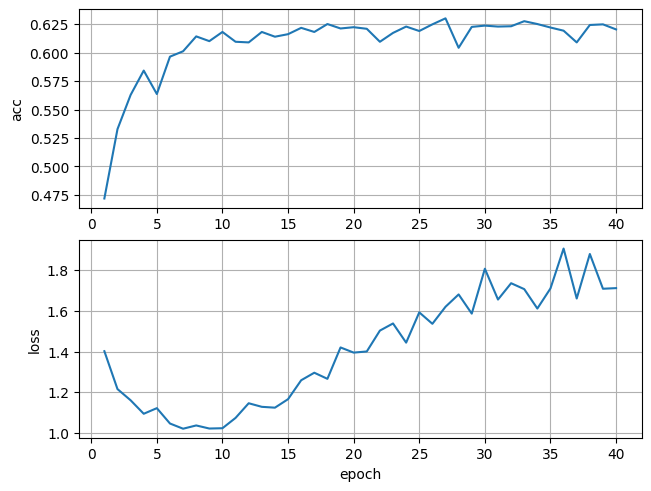

In [64]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2, 1, layout='constrained')
eps = list(range(1, 41))

axs[0].plot(eps, res18_acc)
axs[1].plot(eps, res18_loss)

axs[0].set_ylabel('acc')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')

axs[0].grid(True)
axs[1].grid(True)


plt.show()


## ResNet-18 with augmentation

In [70]:
model = torchvision.models.resnet18(pretrained=True) # pretrained on imagenet

model.fc = nn.Linear(512, 7) # change the last layer

summary(model.cuda(), (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [71]:
acc_list = []
loss_list = []

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

best_acc = 0
since = time.time()
epochs = 40
for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train(aug_dataloader, criterion, optimizer=optimizer)
    test_loss, correct = test(val_dataloader, criterion)
    if correct > best_acc:
        best_acc = correct
        torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': test_loss,
                'acc': correct,
                }, os.path.join(model_path, "best_aug" + ".pth"))

time_elapsed = time.time() - since
print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
print(f'Best val Acc: {best_acc:4f}')

print("Done!")

Epoch 1
-------------------------------
loss: 2.218821  [  256/287090]
loss: 1.527356  [25856/287090]
loss: 1.260006  [51456/287090]
loss: 1.263050  [77056/287090]
loss: 1.246145  [102656/287090]
loss: 1.168384  [128256/287090]
loss: 1.104729  [153856/287090]
loss: 1.051587  [179456/287090]
loss: 0.933721  [205056/287090]
loss: 0.932504  [230656/287090]
loss: 1.025387  [256256/287090]
loss: 0.868527  [281856/287090]
Val Error: 
 Accuracy: 60.9%, Avg loss: 1.044495 

Epoch 2
-------------------------------
loss: 0.875031  [  256/287090]
loss: 0.815658  [25856/287090]
loss: 0.872284  [51456/287090]
loss: 0.875525  [77056/287090]
loss: 0.918160  [102656/287090]
loss: 0.997965  [128256/287090]
loss: 0.806915  [153856/287090]
loss: 0.816802  [179456/287090]
loss: 0.835903  [205056/287090]
loss: 0.802990  [230656/287090]
loss: 0.767626  [256256/287090]
loss: 0.678309  [281856/287090]
Val Error: 
 Accuracy: 63.9%, Avg loss: 0.989347 

Epoch 3
-------------------------------
loss: 0.666562  [ 

In [73]:
res_model = torch.load(os.path.join(model_path, "best_aug.pth"))
model.load_state_dict(res_model['model_state_dict'])

<All keys matched successfully>

In [74]:
eval_res(test_dataloader, model, criterion)

Test Error: 
 Accuracy: 63.5%, Avg loss: 1.983481 



(1.9834808905919392, 0.6349958205628309)

In [75]:
res18_aug_acc = acc_list.copy()
res18_aug_loss = loss_list.copy()

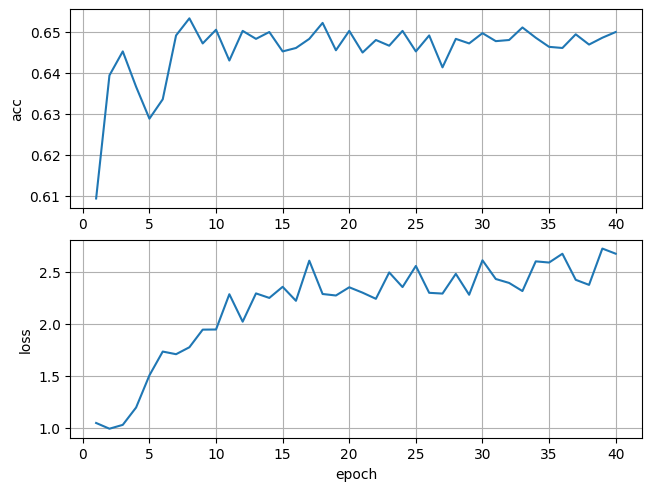

In [77]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2, 1, layout='constrained')
eps = list(range(1, 41))

axs[0].plot(eps, res18_aug_acc)
axs[1].plot(eps, res18_aug_loss)

axs[0].set_ylabel('acc')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')

axs[0].grid(True)
axs[1].grid(True)


plt.show()

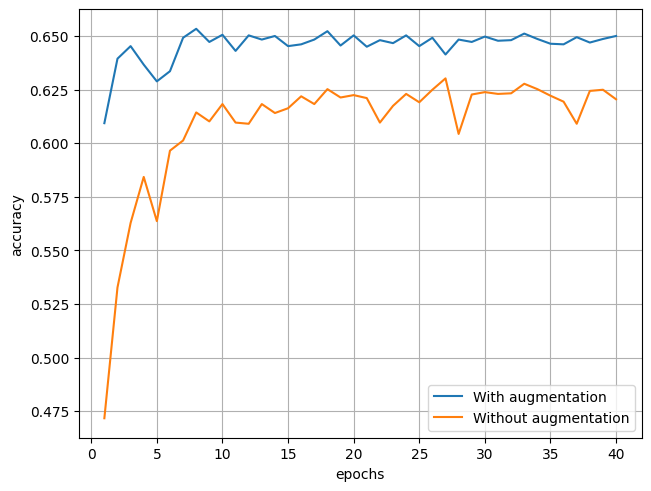

In [85]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1, 1, layout='constrained')
eps = list(range(1, 41))

axs.grid(True)
axs.plot(eps, res18_aug_acc, label='With augmentation')
axs.plot(eps, res18_acc, label='Without augmentation')
axs.legend()
axs.set_ylabel("accuracy")
axs.set_xlabel("epochs")
plt.show()